In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; 

for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. 

<code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.

<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.

Objectives¶
Perform exploratory Data Analysis and determine Training Labels

Exploratory Data Analysis
Determine Training Labels

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

In [2]:
df = pd.read_csv("dataset_part_1.csv")

In [3]:
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,13,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,14,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,15,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,16,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,17,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [4]:
# Identify and calculate the percentage of the missing values in each attribute

df.isnull().sum()/df.shape[0]*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [5]:
df.dtypes
# Date - muuta aikatyypiksi

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

TASK 1: Calculate the number of launches on each site

The data contains several Space X launch facilities: Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A .The location of each Launch Is placed in the column LaunchSite

Next, let's see the number of launches for each site.

Use the method value_counts() on the column LaunchSite to determine the number of launches on each site:

In [6]:
df["LaunchSite"].value_counts()

# CCSFS SLC 40    55 kpl: Vandenberg Air Force Base Space Launch Complex
# KSC LC 39A      22 kpl: Kennedy Space Center Launch Complex
# VAFB SLC 4E     13 kpl: Cape Canaveral Space Launch Complex

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

TASK 2: Calculate the number and occurrence of each orbit¶

Use the method .value_counts() to determine the number and occurrence of each orbit in the column Orbit

In [7]:
df["Orbit"].value_counts()

# GTO      27 --> 35,786 km
# ISS      21 --> low earth orbit
# VLEO     14 --> 450 km
# PO        9 --> ?
# LEO       7 --> 2,000 km
# SSO       5 --> ? 
# MEO       3 --> 20,000 km 
# ES-L1     1 
# HEO       1
# SO        1
# GEO       1 --> 35,786 km

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

TASK 3: Calculate the number and occurence of mission outcome per orbit type

Use the method .value_counts() on the column Outcome to determine the number of landing_outcomes.Then assign it to a variable landing_outcomes.

In [8]:
missio_outcome_per_orbit_type = df.groupby("Orbit")["Outcome"].value_counts()
missio_outcome_per_orbit_type

# This code did not work

Orbit  Outcome    
ES-L1  True Ocean      1
GEO    True ASDS       1
GTO    True ASDS      13
       None None      11
       False ASDS      1
       None ASDS       1
       True Ocean      1
HEO    True ASDS       1
ISS    True RTLS       7
       True ASDS       5
       None None       3
       False ASDS      2
       False Ocean     1
       False RTLS      1
       None ASDS       1
       True Ocean      1
LEO    True RTLS       4
       None None       2
       True Ocean      1
MEO    True ASDS       2
       None None       1
PO     True ASDS       5
       False ASDS      1
       False Ocean     1
       None None       1
       True Ocean      1
SO     None None       1
SSO    True RTLS       3
       True ASDS       2
VLEO   True ASDS      12
       False ASDS      2
Name: Outcome, dtype: int64

In [9]:
df["Outcome"].unique()

#array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       #'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

df["Orbit"].unique()

# array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       #'SO', 'GEO'], dtype=object)

# This code did not work either

array(['LEO', 'ISS', 'PO', 'GTO', 'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO',
       'SO', 'GEO'], dtype=object)

In [10]:
#kolumnit = df["Orbit"].unique()
missio_outcome_per_orbit_type

# With this I could see the result but not visualize it


Orbit  Outcome    
ES-L1  True Ocean      1
GEO    True ASDS       1
GTO    True ASDS      13
       None None      11
       False ASDS      1
       None ASDS       1
       True Ocean      1
HEO    True ASDS       1
ISS    True RTLS       7
       True ASDS       5
       None None       3
       False ASDS      2
       False Ocean     1
       False RTLS      1
       None ASDS       1
       True Ocean      1
LEO    True RTLS       4
       None None       2
       True Ocean      1
MEO    True ASDS       2
       None None       1
PO     True ASDS       5
       False ASDS      1
       False Ocean     1
       None None       1
       True Ocean      1
SO     None None       1
SSO    True RTLS       3
       True ASDS       2
VLEO   True ASDS      12
       False ASDS      2
Name: Outcome, dtype: int64

In [11]:
landing_outcomes = df["Outcome"].value_counts()
landing_outcomes

# This code gave good information in a nutshel

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [12]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

# This code helped to see running count (järjestysnumero) of the good and bad results

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [13]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

# Using "set" was clever idea here

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [14]:
landing_class_1 = []

# New empty list

In [15]:
# Oma koodi, joka sai aikaan 360 arvoa listaan ja ei siis toiminut:

#frame = df["Outcome"]
#for i in frame:
 ##   if i in bad_outcomes:
  # #     landing_class.append(0)
   # else:
    #    landing_class.append(1)

# landing_class[0:10]

# Above did not work, below did! 

for index, row in df.iterrows():
    if row["Outcome"] in bad_outcomes:
        landing_class_1.append(0)
    else:
        landing_class_1.append(1)

# So basically filling the empty list here

In [16]:
df["LandingClass"] = landing_class_1

# Adding this newly filled list to our dataframe

In [17]:
# We can use the following line of code to determine the success rate:

df["LandingClass"].mean()

# So Falcon 9 has landed successfully 66% of the time

0.6666666666666666

In [18]:
df.to_csv("dataset_part_2.csv", index=False)

Lopuksi omia testejä / Finally my own test to the data

In [19]:
# Aluksia on lähtenyt kolmesta eri tukikohdasta: miten ne on päättynyt?
# Eri Orbittien laskeutumis onnistuminen? 

In [20]:
# Eri Orbittien laskeutumis onnistuminen? 

df.groupby("Orbit")["LandingClass"].value_counts()

Orbit  LandingClass
ES-L1  1                1
GEO    1                1
GTO    1               14
       0               13
HEO    1                1
ISS    1               13
       0                8
LEO    1                5
       0                2
MEO    1                2
       0                1
PO     1                6
       0                3
SO     0                1
SSO    1                5
VLEO   1               12
       0                2
Name: LandingClass, dtype: int64

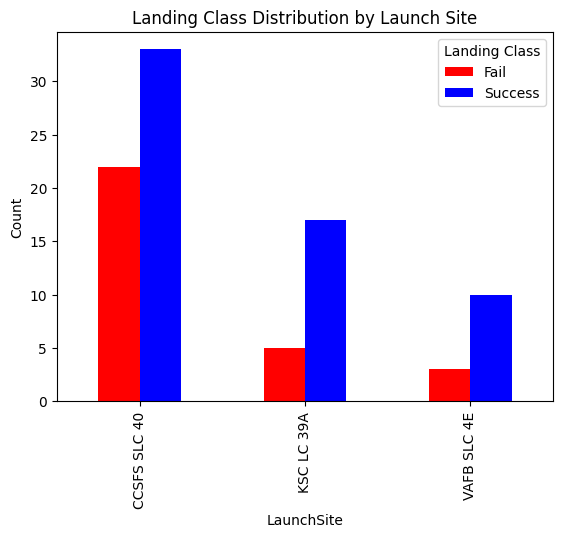

In [26]:
# There has been launches from 3 different bases: what is the fail/success ratio per base? 

import matplotlib.pyplot as plt

# Replace 0 with 'Fail' and 1 with 'Success'
df['LandingClass'] = df['LandingClass'].replace({0: 'Fail', 1: 'Success'})

# Group and count the values
kuva = df.groupby(["LaunchSite", "LandingClass"]).size().unstack(fill_value=0)

# Create a dictionary to map colors to categories
colors = {'Fail': 'red', 'Success': 'blue'}

# Create the bar plot with colors
kuva.plot(kind="bar", color=[colors.get(col, 'green') for col in kuva.columns])

# Add a legend
plt.legend(title='Landing Class')

# Set the Y-axis label
plt.ylabel("Count")

# Add headline
plt.title("Landing Class Distribution by Launch Site")

# Show the plot
plt.show()

